# Plot a fit over a density plot
Use the ``densityreg`` plot method to combine fits and their raw data.

This example uses artifical data to show you the capabilities of the ``densityreg`` plot method.

In [1]:
import numpy as np
import xarray as xr
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False

First we define our data which comes from multiple realizations of the underlying equation ``sin(x)``

In [2]:
all_x = []
all_y = []
for i in range(30):
    deviation = np.abs(np.random.normal())
    all_x.append(np.linspace(-np.pi - deviation, np.pi + deviation))
    all_y.append(np.sin(all_x[-1]) + np.random.normal(scale=0.5, size=all_x[-1].size))
x = np.concatenate(all_x)
y = np.concatenate(all_y)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

<xarray.Dataset>
Dimensions:  (experiment: 1500)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 -4.328 -4.152 -3.975 ... 3.786 3.955 4.123
    y        (experiment) float64 1.425 0.01925 0.9233 ... -1.219 -0.4254

This dataset now contains the two variables ``x`` and ``y``. A scatter plot of the data looks like

psyplot.project.Project([arr0: psyplot.data.InteractiveList([    arr0: 1-dim DataArray of y, with (experiment)=(1500,), ])])

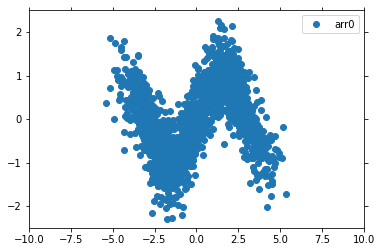

In [3]:
psy.plot.lineplot(ds, name='y', coord='x', marker='o', linewidth=0)

However, it is hard to see how many data points there are shown. Therefore this is a good candidate for a
``density`` plot:

psyplot.project.Project([    arr1: 1-dim DataArray of y, with (experiment)=(1500,), ])

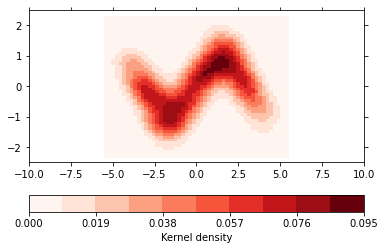

In [4]:
psy.plot.density(ds, name='y', coord='x', cmap='Reds', bins=50, density='kde',
                 clabel='Kernel density')

The ``densityreg`` plot method combines this plot with a fit through the data

/home/circleci/miniconda3/envs/docs/lib/python3.7/site-packages/psy_reg/utils.py:88: RuntimeWarning: Need finite parameter boundaries for automatic initial parameter estimation!
  RuntimeWarning)


psyplot.project.Project([    arr0: 1-dim DataArray of y, with (experiment)=(1500,), ])

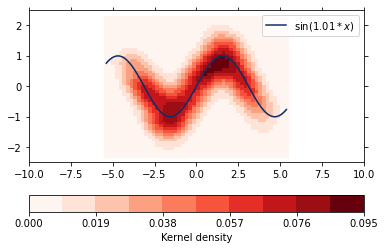

In [5]:
psy.close('all')
psy.plot.densityreg(ds, name='y', coord='x', cmap='Reds', bins=50, density='kde', 
                    clabel='Kernel density',
                    color='Blues_r', fit=lambda x, a: np.sin(a * x), 
                    legendlabels='$\sin (%(a)1.2f * %(xname)s$)')

In [6]:
psy.close('all')